In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import StratifiedShuffleSplit

In [2]:
input = pd.read_excel(r'data.xlsx')

In [3]:
#input

In [4]:
#input.info()

In [5]:
#input["D5"].value_counts()

In [6]:
#input.describe()

In [7]:
#input.hist(bins = 50, figsize = (20,15))
#plt.show()

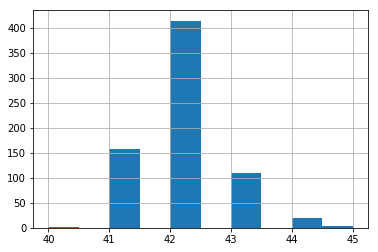

In [8]:
#np.ceil(input["BTM_T"] / 3.2).hist()
#np.ceil(input["BTM_T"] / 3.2).describe()
#np.ceil(input["BTM_T"] / 3.2).value_counts()
input["dummy"] = np.ceil(input["BTM_T"] / 3.2)
input["dummy"].hist()
plt.show()

In [9]:
sss = StratifiedShuffleSplit(n_splits = 1, test_size = 0.2, random_state=42)
print(sss)
for train_index, test_index in sss.split(input, input["dummy"]):
    sss_train_set = input.loc[train_index]
    sss_test_set = input.loc[test_index]

StratifiedShuffleSplit(n_splits=1, random_state=42, test_size=0.2,
            train_size=None)


In [10]:
input["dummy"].value_counts() / len(input)

42.0    0.586402
41.0    0.223796
43.0    0.154391
44.0    0.026912
45.0    0.005666
40.0    0.002833
Name: dummy, dtype: float64

In [11]:
sss_train_set["dummy"].value_counts() / len(sss_train_set)

42.0    0.586879
41.0    0.223404
43.0    0.154255
44.0    0.026596
45.0    0.005319
40.0    0.003546
Name: dummy, dtype: float64

In [12]:
sss_test_set["dummy"].value_counts() / len(sss_test_set)

42.0    0.584507
41.0    0.225352
43.0    0.154930
44.0    0.028169
45.0    0.007042
Name: dummy, dtype: float64

In [13]:
for delete in (sss_train_set, sss_test_set):
    delete.drop("dummy",axis = 1, inplace=True)
# sss_train_set.drop("dummy", axis = 1, inplace = True) #두 데이터 셋 모두에게 같은 동작을 한 번에 하기 위함

In [14]:
sss_train_set.head()

,D5,C5_F,PN_F,Reflux_F,Reb_F,BTM_F,Feed_T,Reb_T,BTM_T
375,96.0,19.964194,111.361047,273.611002,12.101528,307.969509,108.345167,134.968980,132.160292
350,94.0,30.001320,194.712834,313.412219,13.200969,357.589721,109.453511,136.591655,133.445360
131,94.0,38.498788,191.783148,342.131102,14.960142,376.625068,109.691097,137.022279,133.649119
73,95.0,43.009526,178.196803,292.845578,14.255091,376.220207,109.231189,138.628075,135.227066
555,92.0,20.003434,149.242512,286.877326,12.804798,327.276755,103.851503,132.153637,128.961300


In [15]:
input = sss_train_set.copy()

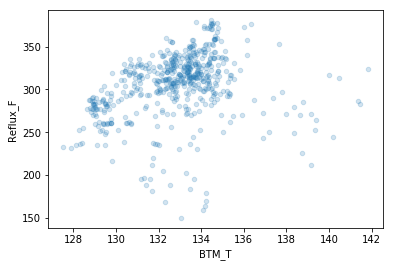

In [41]:
input.plot(kind="scatter", x = "BTM_T", y = "Reflux_F", alpha = 0.2)
plt.show()

No handles with labels found to put in legend.


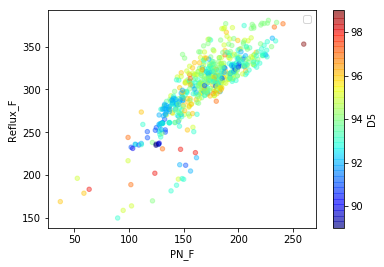

In [62]:
input.plot(kind="scatter", x = "PN_F", y = "Reflux_F", alpha = 0.4,
          #s = input["Reb_F"], label = "Reb_F", figsize = (7, 4),
          c = "D5", cmap = plt.get_cmap("jet"), colorbar = True, sharex = False)
plt.legend()

No handles with labels found to put in legend.


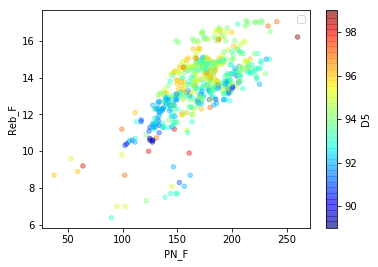

In [63]:
input.plot(kind="scatter", x = "PN_F", y = "Reb_F", alpha = 0.4,
          #s = input["Reb_F"], label = "Reb_F", figsize = (7, 4),
          c = "D5", cmap = plt.get_cmap("jet"), colorbar = True, sharex = False)
plt.legend()

No handles with labels found to put in legend.


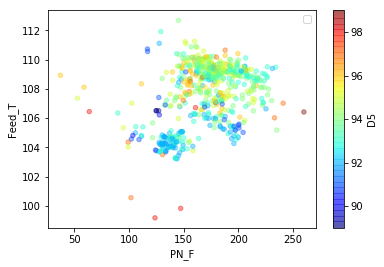

In [65]:
input.plot(kind="scatter", x = "PN_F", y = "Feed_T", alpha = 0.4,
          #s = input["Reb_F"], label = "Reb_F", figsize = (7, 4),
          c = "D5", cmap = plt.get_cmap("jet"), colorbar = True, sharex = False)
plt.legend()